**Importing libraries**

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

**Importing the dataset via Keras Api**

In [368]:
df= keras.datasets.mnist.load_data()

**Splitting dataset into train and test**

In [369]:
(X_train,y_train),(X_test,y_test)=df

In [370]:
print("Number of images in train dataset",len(X_train))
print("Number of images in test dataset",len(X_test))


Number of images in train dataset 60000
Number of images in test dataset 10000


In [371]:
print("Shape of each image in pixels",X_train[0].shape)

Shape of each image in pixels (28, 28)


In [372]:
label=pd.Series(y_train) 

**Displaying digits from MNIST dataset**

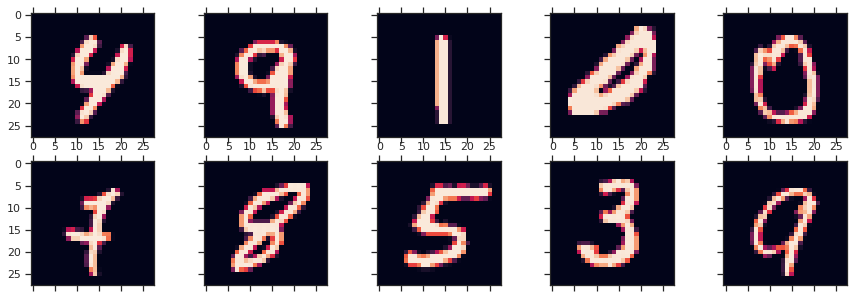

In [373]:
import random
fig,ax=plt.subplots(2,5,sharex='all',sharey='all',figsize=(15,5))
ax=ax.flatten()
for i in range(10):
    show=X_train[random.randint(0,60000)].reshape(28,28)
    ax[i].matshow(show)

**Total number of each digit**

In [374]:
k=label.value_counts().sort_index()
df_new=pd.DataFrame(k,columns=['Number of Digits'])
df_new

,Number of Digits
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


**Barplot showing the number of each digit**

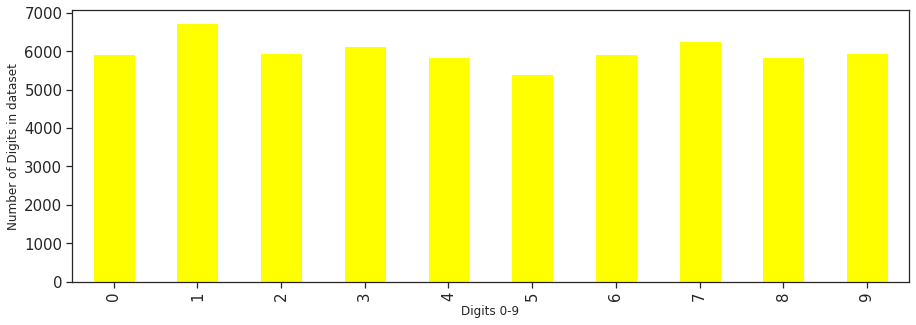

In [375]:
k.plot(kind='bar',color="yellow",figsize=(15,5),fontsize=15)
plt.xlabel("Digits 0-9")
plt.ylabel("Number of Digits in dataset")
plt.show()

**Pie plot **

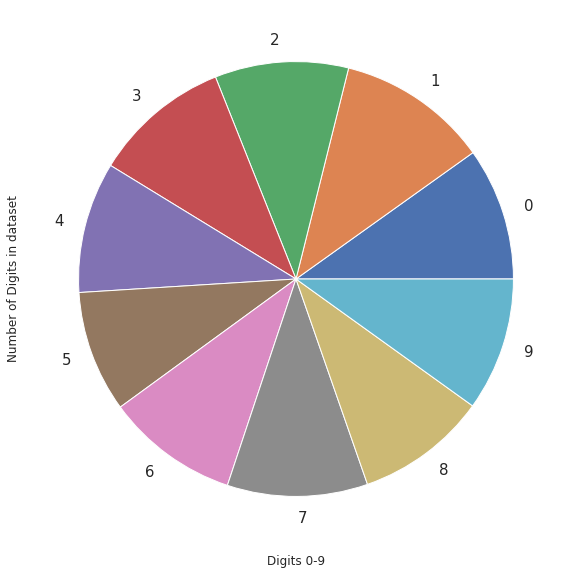

In [376]:
k.plot(kind='pie',figsize=(30,10),fontsize=15)
plt.xlabel("Digits 0-9")
plt.ylabel("Number of Digits in dataset")
plt.show()

In [377]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Number of Digits  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


In [378]:
df_new.describe()

,Number of Digits
count,10.000000
mean,6000.000000
std,339.505196
min,5421.000000
25%,5867.750000
50%,5936.000000
75%,6087.750000
max,6742.000000


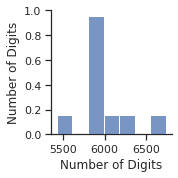

In [379]:
sns.set(style="ticks",color_codes=True,)
sns.pairplot(df_new)

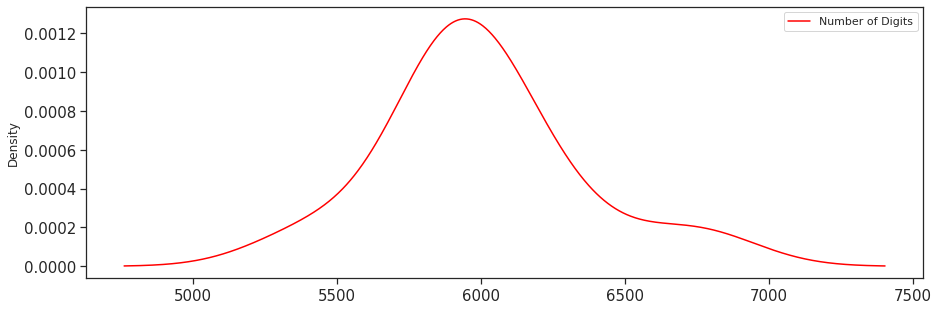

In [380]:
ax=df_new.plot.kde(color="red",figsize=(15,5),fontsize=15)

#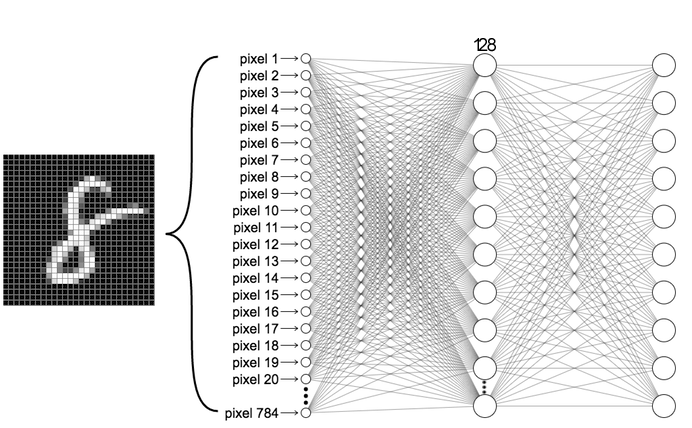** Building a CNN **

In [381]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\n Reached 99.5% accuracy so cancelling training")
      self.model.stop_training = True
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train=X_train.reshape(60000,28,28,1)
X_train=X_train/255.0
X_test=X_test.reshape(10000,28,28,1)
X_test=X_test/255.0
callbacks = myCallback()
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='sigmoid'),
  tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,callbacks=[callbacks])

test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1367 - accuracy: 0.9609
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9927
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9967

 Reached 99.5% accuracy so cancelling training
313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9918
0.9918000102043152
